In [1]:
from osgeo import ogr, osr, gdal
import matplotlib.pyplot as plt

In [2]:
gdal.UseExceptions()

In [3]:
gtif = gdal.Open('data/train_input/10078660_15.tiff')
gtif.GetProjectionRef()

'PROJCS["NAD83 / Massachusetts Mainland",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["standard_parallel_1",42.68333333333333],PARAMETER["standard_parallel_2",41.71666666666667],PARAMETER["latitude_of_origin",41],PARAMETER["central_meridian",-71.5],PARAMETER["false_easting",200000],PARAMETER["false_northing",750000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["X",EAST],AXIS["Y",NORTH],AUTHORITY["EPSG","26986"]]'

In [4]:
arr = gtif.ReadAsArray()
trans = gtif.GetGeoTransform()
print(trans)

(99986.4362, 1.0, 0.0, 866771.025, 0.0, -0.9999999999999225)


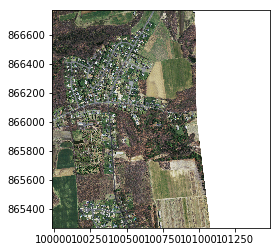

In [5]:
extent = (trans[0], trans[0] + gtif.RasterXSize*trans[1], 
          trans[3] + gtif.RasterYSize*trans[5], trans[3])
plt.imshow(arr[:3,:,:].transpose(2,1,0), extent = extent)

In [7]:
def getExtent(gt, cols,rows):
    ext = []
    xarr = [0, cols]
    yarr = [0, rows]
    for px in xarr:
        for py in yarr:
            x = gt[0]+(px*gt[1])+(py*gt[2])
            y = gt[3]+(px*gt[4])+(py*gt[5])
            ext.append([x,y])
        yarr.reverse()
    return ext

def Reproject(coords, src, tgt):
    trans = []
    transform = osr.CoordinateTransformation(src, tgt)
    for a,b in coords:
        x,y,z = transform.TransformPoint(a,b)
        trans.append([x,y])
    return trans


In [6]:
cols = gtif.RasterXSize
rows = gtif.RasterYSize
ext = getExtent(trans, cols, rows)
src = osr.SpatialReference()
src.ImportFromWkt(gtif.GetProjection())
tgt = src.CloneGeogCS()
ext = Reproject(ext,src,tgt)
print(ext)


NameError: name 'getExtent' is not defined